In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [32]:
df=pd.read_csv('black_friday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [34]:
df['Product_Category_2'].isnull().sum()/len(df)*100

31.56664266963357

In [35]:
for i in df.columns:
    if (df[i].isnull().sum())/(len(df))*100 > 50:
        df.drop(i,axis=1,inplace=True)
    else:
        continue
                               

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [37]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


In [38]:
df.shape

(550068, 11)

In [39]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')

In [41]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [42]:
df['Product_Category_2']=imputer.fit_transform(df[['Product_Category_2']])


In [43]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [44]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [27]:
numb_col=df.select_dtypes(include='number')

In [45]:
df=df.drop('User_ID',axis=1)

In [46]:
df=df.drop('Product_ID',axis=1)

In [51]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,1,10,A,2,0,3,8.0,8370
1,F,1,10,A,2,0,1,6.0,15200
2,F,1,10,A,2,0,12,8.0,1422
3,F,1,10,A,2,0,12,14.0,1057
4,M,7,16,C,4+,0,8,8.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,6,13,B,1,1,20,8.0,368
550064,F,3,1,C,3,0,20,8.0,371
550065,F,3,15,B,4+,1,20,8.0,137
550066,F,7,1,C,2,0,20,8.0,365


In [48]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [49]:
dict1={'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}

In [50]:
df['Age']=df['Age'].map(dict1)

In [26]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [53]:
df=df.mask(df['Stay_In_Current_City_Years']=='4+',4)

In [54]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,1,10,A,2,0,3,8.0,8370
1,F,1,10,A,2,0,1,6.0,15200
2,F,1,10,A,2,0,12,8.0,1422
3,F,1,10,A,2,0,12,14.0,1057
4,4,4,4,4,4,4,4,4.0,4
...,...,...,...,...,...,...,...,...,...
550063,M,6,13,B,1,1,20,8.0,368
550064,F,3,1,C,3,0,20,8.0,371
550065,4,4,4,4,4,4,4,4.0,4
550066,F,7,1,C,2,0,20,8.0,365


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 37.8+ MB


In [56]:
df['Stay_In_Current_City_Years']=pd.to_numeric(df['Stay_In_Current_City_Years'],errors='coerce')

In [57]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,1,10,A,2,0,3,8.0,8370
1,F,1,10,A,2,0,1,6.0,15200
2,F,1,10,A,2,0,12,8.0,1422
3,F,1,10,A,2,0,12,14.0,1057
4,4,4,4,4,4,4,4,4.0,4
...,...,...,...,...,...,...,...,...,...
550063,M,6,13,B,1,1,20,8.0,368
550064,F,3,1,C,3,0,20,8.0,371
550065,4,4,4,4,4,4,4,4.0,4
550066,F,7,1,C,2,0,20,8.0,365


In [60]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [28]:
from datasist.structdata import detect_outliers


In [30]:
for col in numb_col.columns:
    med=numb_col[col].median()
    out=detect_outliers(numb_col,0,[col])
    numb_col.loc[out,col]=med

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [32]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [34]:
df=pd.get_dummies(df,columns=['Age','Gender','Marital_Status','Stay_In_Current_City_Years'],drop_first=True)

In [43]:
df=pd.get_dummies(df,columns=['City_Category'],drop_first=True)

In [44]:
df

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,Marital_Status_1,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
0,10,3,8.0,16.0,8370,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10,12,8.0,16.0,1422,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,10,12,14.0,16.0,1057,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16,8,8.0,16.0,7969,0,0,0,0,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,20,8.0,16.0,368,0,0,0,0,1,0,1,1,1,0,0,0,1,0
550064,1,20,8.0,16.0,371,0,1,0,0,0,0,0,0,0,0,1,0,0,1
550065,15,20,8.0,16.0,137,0,1,0,0,0,0,0,1,0,0,0,1,1,0
550066,1,20,8.0,16.0,365,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [45]:
x=df.drop('Purchase',axis=1)
x

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,Marital_Status_1,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
0,10,3,8.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10,1,6.0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10,12,8.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,10,12,14.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16,8,8.0,16.0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,20,8.0,16.0,0,0,0,0,1,0,1,1,1,0,0,0,1,0
550064,1,20,8.0,16.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
550065,15,20,8.0,16.0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
550066,1,20,8.0,16.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [37]:
y=df['Purchase']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [48]:
x_train

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,Marital_Status_1,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
529969,4,5,8.0,16.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
489075,5,1,2.0,11.0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
60693,0,2,5.0,8.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
381752,2,15,16.0,16.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
141968,20,1,11.0,15.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,7,8,14.0,16.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
491263,1,1,6.0,8.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
470924,9,5,11.0,12.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
491755,0,5,8.0,16.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [49]:
x_test

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,Marital_Status_1,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_B,City_Category_C
470060,11,8,14.0,16.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
395974,16,4,5.0,8.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
14234,20,8,14.0,16.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
72183,17,8,8.0,16.0,0,1,0,0,0,0,1,1,1,0,0,0,1,0
272536,7,1,11.0,15.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177713,12,6,8.0,16.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
231972,12,1,2.0,14.0,1,0,0,0,0,0,1,1,0,0,1,0,1,0
82378,14,5,6.0,16.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
353277,0,8,17.0,16.0,0,1,0,0,0,0,1,0,0,0,0,1,0,1


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# ...................

In [51]:
df2=pd.read_csv('loan_data.csv')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [54]:
df2=df2.drop('Loan_ID',axis=1)

In [55]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [56]:
df2.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='LoanAmount'>

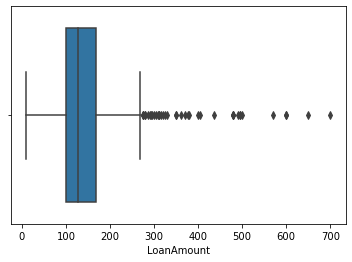

In [57]:
sn.boxplot(data=df2,x='LoanAmount')

<AxesSubplot:xlabel='CoapplicantIncome'>

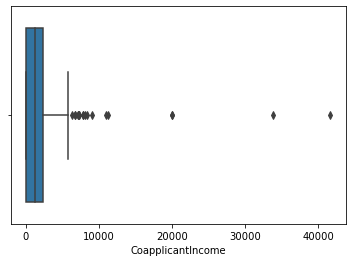

In [58]:
sn.boxplot(data=df2,x='CoapplicantIncome')

<AxesSubplot:xlabel='ApplicantIncome'>

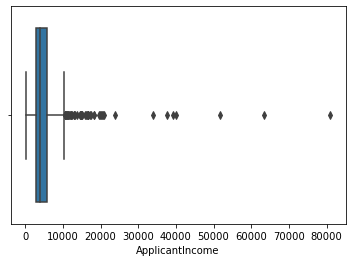

In [62]:
sn.boxplot(data=df2,x='ApplicantIncome')

In [60]:
df2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [61]:
df2['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')

In [68]:
df2['Credit_History']=imputer1.fit_transform(df2[['Credit_History']])
df2['Loan_Amount_Term']=imputer1.fit_transform(df2[['Loan_Amount_Term']])

In [70]:
df2['Credit_History'].isnull().sum()

0

In [71]:
df2['Loan_Amount_Term'].isnull().sum()

0

In [73]:
df2['LoanAmount']=imputer2.fit_transform(df2[['LoanAmount']])

In [74]:
df2['Gender']=imputer1.fit_transform(df2[['Gender']])
df2['Self_Employed']=imputer1.fit_transform(df2[['Self_Employed']])
df2['Dependents']=imputer1.fit_transform(df2[['Dependents']])

In [76]:
df2['Married']=imputer1.fit_transform(df2[['Married']])

In [77]:
df2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
numb_col=df2[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [84]:
numb_col

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,128.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [87]:
for col in numb_col.columns:
    med=numb_col[col].median()
    out1=detect_outliers(numb_col,0,[col])
    numb_col.loc[out1,col]=med

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [88]:
df2=pd.get_dummies(df2,columns=['Gender','Married','Dependents','Education','Self_Employed'],drop_first=True)

In [90]:
df2=pd.get_dummies(df2,columns=['Property_Area','Loan_Status'],drop_first=True)

In [91]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [92]:
x=df2.drop('Loan_Status_Y',axis=1)

In [93]:
y=df2['Loan_Status_Y']

In [94]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [95]:
y.value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=99)

In [99]:
x,y=sm.fit_resample(x,y)

In [100]:
y.value_counts()

1    422
0    422
Name: Loan_Status_Y, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=12)

In [103]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
324,15000,0.00000,300.000000,360.000000,1.000000,1,1,0,0,1,0,0,0,0
45,3410,0.00000,88.000000,360.000000,1.000000,0,0,0,0,0,0,0,0,1
194,4191,0.00000,120.000000,360.000000,1.000000,1,0,0,0,0,0,0,0,0
528,2679,1302.00000,94.000000,360.000000,1.000000,1,0,1,0,0,1,0,1,0
694,4444,1479.73111,128.362422,360.000000,1.000000,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,4582,0.00000,84.377596,360.000000,1.000000,0,1,0,0,0,0,0,0,0
778,10831,0.00000,95.122168,360.000000,1.000000,1,0,0,0,0,0,1,0,0
371,5185,0.00000,155.000000,360.000000,1.000000,1,1,0,1,0,0,0,1,0
172,3522,0.00000,81.000000,180.000000,1.000000,1,1,0,0,1,1,0,0,0


In [104]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
606,3400,2500.000000,173.000000,360.000000,1.000000,1,1,1,0,0,0,0,1,0
198,3416,2816.000000,113.000000,360.000000,1.000000,0,1,0,0,0,0,0,1,0
267,4333,1811.000000,160.000000,360.000000,0.000000,1,1,0,0,1,0,0,0,1
659,10222,1296.140298,193.475344,360.000000,1.000000,0,0,0,0,0,0,0,0,0
415,2995,0.000000,60.000000,360.000000,1.000000,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3166,2985.000000,132.000000,360.000000,1.000000,0,0,0,0,0,0,0,0,0
399,1500,1800.000000,103.000000,360.000000,0.000000,0,0,0,0,0,0,0,1,0
675,3373,0.000000,91.773085,117.159142,1.000000,1,0,0,0,0,0,0,1,0
619,2930,1663.142188,128.894308,360.000000,0.776423,1,1,0,1,0,0,0,0,0


In [105]:
scaler2=StandardScaler()

In [106]:
scaler2.fit(x_train)
x_train=scaler2.transform(x_train)
x_test=scaler2.transform(x_test)